In [4]:
#Mysql￾ Python ￾￾
import pymysql
import pandas as pd
conn = pymysql.connect(host='165.229.89.158',port=8080,
user='student20', passwd = 'Edu1234!', db = 'Airline', 
                       charset='utf8' ,
                       cursorclass = pymysql.cursors.DictCursor)
cur= conn.cursor()


In [5]:
selectQ = 'SELECT Year, Month, concat(Year, Month) as YM, Count(*) as Cnt '
selectQ += 'FROM flightinfo ' 
selectQ += 'GROUP BY Year, Month'

cur.execute(selectQ)
result = cur.fetchall()
flightCnt_df = pd.DataFrame(result)


In [6]:
flightCnt_df

,Cnt,Month,YM,Year
0,552109,1,20031,2003
1,500206,2,20032,2003
2,559342,3,20033,2003
3,527303,4,20034,2003
4,533782,5,20035,2003
5,536496,6,20036,2003
6,558568,7,20037,2003
7,556984,8,20038,2003
8,527714,9,20039,2003
9,552370,10,200310,2003


In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

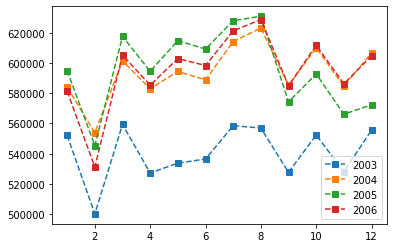

In [16]:
#plt.plot(x, y, )


#plt.plot(flightCnt_df[flightCnt_df.Year == 2003].Month,
#        flightCnt_df[flightCnt_df.Year == 2003].Cnt,
#        "s--",
#        label = 2003)

for i in range(2003, 2007):
    plt.plot(flightCnt_df[flightCnt_df.Year == i].Month,
         flightCnt_df[flightCnt_df.Year == i].Cnt,
         "s--",
         label = i)

plt.legend()

In [18]:
selectQ = 'SELECT UniqueCarrier,'
selectQ += 'avg(Cancelled) as rateCancel, avg(DepDelay) as avg_Delay, count(*) as Cnt '
selectQ += 'FROM Airline.flightinfo group by UniqueCarrier'
print(selectQ)
cur.execute(selectQ)
result = cur.fetchall()
can_delay_df = pd.DataFrame(result)
can_delay_df.sort_values(by = 'Cnt', ascending = False)


SELECT UniqueCarrier,avg(Cancelled) as rateCancel, avg(DepDelay) as avg_Delay, count(*) as Cnt FROM Airline.flightinfo group by UniqueCarrier


,Cnt,UniqueCarrier,avg_Delay,rateCancel
2,5253196,WN,9.529144,0.009047
12,3401812,AA,9.350217,0.018309
8,2988532,DL,7.064168,0.016599
0,2575697,UA,9.156518,0.015891
3,2534800,MQ,9.018547,0.035896
5,2523694,OO,6.985079,0.020983
4,2334684,NW,5.796334,0.013590
1,2247775,US,7.904356,0.016023
6,1975799,XE,7.723321,0.021257
15,1531272,CO,8.123087,0.007560


In [19]:
df = can_delay_df.sort_values(by = 'Cnt', ascending = False)
top_5_Carrier = df.iloc[0:5]['UniqueCarrier'] #loc￾ ￾￾￾ ￾￾ (￾￾￾￾￾ ￾￾ ￾￾￾ ￾￾ 0￾￾ 4￾￾)
top_5_Carrier
bottom_5_Carrier = df.iloc[18:]['UniqueCarrier']
bottom_5_Carrier


22    9E
19    F9
17    HA
7     TZ
21    AQ
Name: UniqueCarrier, dtype: object

In [17]:
# 항공사의 년별 비행횟수 정보 읽기
selectQ = 'select UniqueCarrier, Year, count(*) as Cnt from flightinfo group by UniqueCarrier, Year'
cur.execute(selectQ)
result = cur.fetchall()
grow_carrier_df = pd.DataFrame(result)
grow_carrier_df


,Cnt,UniqueCarrier,Year
0,543957,UA,2003
1,411956,US,2003
2,958566,WN,2003
3,429098,MQ,2003
4,499160,NW,2003
5,396801,OO,2003
6,328086,XE,2003
7,69176,TZ,2003
8,660617,DL,2003
9,273712,EV,2003


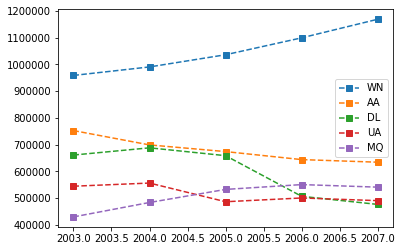

In [21]:
# 그래프 그리기
for uniq in top_5_Carrier :
    plt.plot(grow_carrier_df[grow_carrier_df.UniqueCarrier == uniq].Year,
             grow_carrier_df[grow_carrier_df.UniqueCarrier == uniq].Cnt,
             "s--",
             label =uniq)
plt.legend()
